In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
base_url = "https://www.zappos.com/mens-shoes/.zso?t=mens%20shoes&p="
headers = {"User-Agent": "Mozilla/5.0"}

In [ ]:
data = []

In [ ]:
for page in range(1, 79):
    url = f"{base_url}{page}"

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select("#products>article")
    for product in products:
        brand = product.select_one(".dB-z span").text.strip()
        model = product.select_one(".eB-z").text.strip()
        price = product.select_one(".W0-z").text.strip()
        rating = product.select_one(".zK-z .AK-z")
        rating_value = rating.text.strip() if rating else "N/A"
        site = 'Zappos'
        data.append({
            "Brand": brand,
            "Title": model,
            "Price": price,
            "Rating": rating,
            "Site": site
        })
    time.sleep(1)

In [ ]:
dataZappos = pd.DataFrame(data)

In [ ]:
dataZappos

,Brand,Title,Price,Rating,Site
0,adidas Running,Adistar 4 Running Shoes,$139.95,None,Zappos
1,GFORE,Men's G.112 P.U. Leather Colour Block Golf Shoes,$225.00,None,Zappos
2,FootJoy,Premiere Series - Wilcox Golf Shoes- Previous ...,$155.46,[5],Zappos
3,FootJoy,FJ Flex Golf Shoes,$79.95,[4],Zappos
4,Propet,Stability X Strap,$71.96,[4],Zappos
...,...,...,...,...,...
7792,Smartwool,Hike Light Cushion Colorado Crew Socks,$25.00,[5],Zappos
7793,Falke,ESS Trekking - TK2,$29.95,None,Zappos
7794,Smartwool,Hike Light Cushion Striped Mid Crew Socks,$24.00,[5],Zappos
7795,Wigwam,Super Boot 2-Pack,$25.00,[4],Zappos


Merging two columns into one to get the full name of the product

In [ ]:
dataZappos['Name'] = dataZappos['Brand'].fillna('') + ' ' + dataZappos['Title'].fillna('')
dataZappos['Name'] = dataZappos['Name'].str.strip()

In [ ]:
dataZappos

,Brand,Title,Price,Rating,Site,Name
0,adidas Running,Adistar 4 Running Shoes,$139.95,None,Zappos,adidas Running Adistar 4 Running Shoes
1,GFORE,Men's G.112 P.U. Leather Colour Block Golf Shoes,$225.00,None,Zappos,GFORE Men's G.112 P.U. Leather Colour Block Go...
2,FootJoy,Premiere Series - Wilcox Golf Shoes- Previous ...,$155.46,[5],Zappos,FootJoy Premiere Series - Wilcox Golf Shoes- P...
3,FootJoy,FJ Flex Golf Shoes,$79.95,[4],Zappos,FootJoy FJ Flex Golf Shoes
4,Propet,Stability X Strap,$71.96,[4],Zappos,Propet Stability X Strap
...,...,...,...,...,...,...
7792,Smartwool,Hike Light Cushion Colorado Crew Socks,$25.00,[5],Zappos,Smartwool Hike Light Cushion Colorado Crew Socks
7793,Falke,ESS Trekking - TK2,$29.95,None,Zappos,Falke ESS Trekking - TK2
7794,Smartwool,Hike Light Cushion Striped Mid Crew Socks,$24.00,[5],Zappos,Smartwool Hike Light Cushion Striped Mid Crew ...
7795,Wigwam,Super Boot 2-Pack,$25.00,[4],Zappos,Wigwam Super Boot 2-Pack


drop columns

In [ ]:
dataZappos = dataZappos.drop(columns=['Brand', 'Title'])

In [ ]:
dataZappos

,Price,Rating,Site,Name
0,$139.95,None,Zappos,adidas Running Adistar 4 Running Shoes
1,$225.00,None,Zappos,GFORE Men's G.112 P.U. Leather Colour Block Go...
2,$155.46,[5],Zappos,FootJoy Premiere Series - Wilcox Golf Shoes- P...
3,$79.95,[4],Zappos,FootJoy FJ Flex Golf Shoes
4,$71.96,[4],Zappos,Propet Stability X Strap
...,...,...,...,...
7792,$25.00,[5],Zappos,Smartwool Hike Light Cushion Colorado Crew Socks
7793,$29.95,None,Zappos,Falke ESS Trekking - TK2
7794,$24.00,[5],Zappos,Smartwool Hike Light Cushion Striped Mid Crew ...
7795,$25.00,[4],Zappos,Wigwam Super Boot 2-Pack


setting column name to first position

In [ ]:
cols = dataZappos.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
dataZappos = dataZappos[cols]

In [ ]:
dataZappos

,Name,Price,Rating,Site
0,adidas Running Adistar 4 Running Shoes,$139.95,None,Zappos
1,GFORE Men's G.112 P.U. Leather Colour Block Go...,$225.00,None,Zappos
2,FootJoy Premiere Series - Wilcox Golf Shoes- P...,$155.46,[5],Zappos
3,FootJoy FJ Flex Golf Shoes,$79.95,[4],Zappos
4,Propet Stability X Strap,$71.96,[4],Zappos
...,...,...,...,...
7792,Smartwool Hike Light Cushion Colorado Crew Socks,$25.00,[5],Zappos
7793,Falke ESS Trekking - TK2,$29.95,None,Zappos
7794,Smartwool Hike Light Cushion Striped Mid Crew ...,$24.00,[5],Zappos
7795,Wigwam Super Boot 2-Pack,$25.00,[4],Zappos


Removing $ from price

In [ ]:
dataZappos['Price'] = dataZappos['Price'].str.replace('$', '', regex=False).str.strip()

In [ ]:
dataZappos

,Name,Price,Rating,Site
0,adidas Running Adistar 4 Running Shoes,139.95,None,Zappos
1,GFORE Men's G.112 P.U. Leather Colour Block Go...,225.00,None,Zappos
2,FootJoy Premiere Series - Wilcox Golf Shoes- P...,155.46,[5],Zappos
3,FootJoy FJ Flex Golf Shoes,79.95,[4],Zappos
4,Propet Stability X Strap,71.96,[4],Zappos
...,...,...,...,...
7792,Smartwool Hike Light Cushion Colorado Crew Socks,25.00,[5],Zappos
7793,Falke ESS Trekking - TK2,29.95,None,Zappos
7794,Smartwool Hike Light Cushion Striped Mid Crew ...,24.00,[5],Zappos
7795,Wigwam Super Boot 2-Pack,25.00,[4],Zappos


adjust rating

In [ ]:
dataZappos

,Name,Price,Rating,Site
0,adidas Running Adistar 4 Running Shoes,139.95,None,Zappos
1,GFORE Men's G.112 P.U. Leather Colour Block Go...,225.00,None,Zappos
2,FootJoy Premiere Series - Wilcox Golf Shoes- P...,155.46,[5],Zappos
3,FootJoy FJ Flex Golf Shoes,79.95,[4],Zappos
4,Propet Stability X Strap,71.96,[4],Zappos
...,...,...,...,...
7792,Smartwool Hike Light Cushion Colorado Crew Socks,25.00,[5],Zappos
7793,Falke ESS Trekking - TK2,29.95,None,Zappos
7794,Smartwool Hike Light Cushion Striped Mid Crew ...,24.00,[5],Zappos
7795,Wigwam Super Boot 2-Pack,25.00,[4],Zappos


In [ ]:
dataZappos['Rating'] = dataZappos['Rating'].astype(str).str.extract(r'(\d+)')
dataZappos['Rating'] = pd.to_numeric(dataZappos['Rating'], errors='coerce')

In [ ]:
dataZappos

,Name,Price,Rating,Site
0,adidas Running Adistar 4 Running Shoes,139.95,NaN,Zappos
1,GFORE Men's G.112 P.U. Leather Colour Block Go...,225.00,NaN,Zappos
2,FootJoy Premiere Series - Wilcox Golf Shoes- P...,155.46,5.0,Zappos
3,FootJoy FJ Flex Golf Shoes,79.95,4.0,Zappos
4,Propet Stability X Strap,71.96,4.0,Zappos
...,...,...,...,...
7792,Smartwool Hike Light Cushion Colorado Crew Socks,25.00,5.0,Zappos
7793,Falke ESS Trekking - TK2,29.95,NaN,Zappos
7794,Smartwool Hike Light Cushion Striped Mid Crew ...,24.00,5.0,Zappos
7795,Wigwam Super Boot 2-Pack,25.00,4.0,Zappos


In [ ]:
dataZappos.isnull().sum()

,0
Name,0
Price,0
Rating,2167
Site,0


In [ ]:
dataZappos = dataZappos.dropna()

In [ ]:
dataZappos.isnull().sum()

,0
Name,0
Price,0
Rating,0
Site,0


In [ ]:
base_url = 'https://www.footlocker.co.uk/en/category/men/shoes?currentPage='
headers = {"User-Agent": "Mozilla/5.0"}

In [ ]:
data1 = []

In [ ]:
import re

In [ ]:
for page in range(0, 25):

    url = f"{base_url}{page}"

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select(".product-container")

    for product in products:
        product_name_tag = product.select_one('.ProductName-primary')
        product_name = product_name_tag.text.strip() if product_name_tag else None
        price_tag = product.select_one('.ProductPrice .ProductPrice-final') or product.select_one('.ProductPrice span')
        price = price_tag.text.strip() if price_tag else None
        rating_text_tag = product.select_one('span.visually-hidden')
        rating = None
        if rating_text_tag:
            rating_text = rating_text_tag.text.strip()
            match = re.search(r"\[(\d+) out of", rating_text)
            if match:
                rating = match.group(1)


        site = 'FootLocker'
        data1.append({
            "Name": product_name,
            "Price": price,
            "Rating": rating,
            "Site": site
        })

    time.sleep(1)

In [ ]:
dataFootLocker = pd.DataFrame(data1)

In [ ]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,£ 174.99,4,FootLocker
1,adidas Megaride,£ 139.99,None,FootLocker
2,Jordan Aj1 Mid,£ 75.00,5,FootLocker
3,Nike Dunk Low,£ 109.99,None,FootLocker
4,adidas Handball Spezial,£ 84.99,5,FootLocker
...,...,...,...,...
1102,Converse Chuck 70 AT-CX High,£ 94.99,5,FootLocker
1103,Vans Lowland Cc Jmp R,£ 40.00,None,FootLocker
1104,Diadora Magic Basket Low,£ 99.99,None,FootLocker
1105,UGG Lowmel,£ 134.99,None,FootLocker


Convert pounds to dollars

In [ ]:
conversion_rate = 1.35
dataFootLocker['Price'] = dataFootLocker['Price'].str.replace('£', '').str.strip()
dataFootLocker['Price'] = dataFootLocker['Price'].str.replace(',', '')
dataFootLocker['Price'] = dataFootLocker['Price'].astype(float)

dataFootLocker['Price'] = dataFootLocker['Price'] * conversion_rate

dataFootLocker['Price'] = dataFootLocker['Price'].round(2)


In [ ]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4,FootLocker
1,adidas Megaride,188.99,None,FootLocker
2,Jordan Aj1 Mid,101.25,5,FootLocker
3,Nike Dunk Low,148.49,None,FootLocker
4,adidas Handball Spezial,114.74,5,FootLocker
...,...,...,...,...
1102,Converse Chuck 70 AT-CX High,128.24,5,FootLocker
1103,Vans Lowland Cc Jmp R,54.00,None,FootLocker
1104,Diadora Magic Basket Low,134.99,None,FootLocker
1105,UGG Lowmel,182.24,None,FootLocker


convert from float

In [ ]:
dataFootLocker['Rating'] = dataFootLocker['Rating'].astype(float)

In [ ]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4.0,FootLocker
1,adidas Megaride,188.99,NaN,FootLocker
2,Jordan Aj1 Mid,101.25,5.0,FootLocker
3,Nike Dunk Low,148.49,NaN,FootLocker
4,adidas Handball Spezial,114.74,5.0,FootLocker
...,...,...,...,...
1102,Converse Chuck 70 AT-CX High,128.24,5.0,FootLocker
1103,Vans Lowland Cc Jmp R,54.00,NaN,FootLocker
1104,Diadora Magic Basket Low,134.99,NaN,FootLocker
1105,UGG Lowmel,182.24,NaN,FootLocker


In [ ]:
dataFootLocker.isnull().sum()

,0
Name,0
Price,0
Rating,521
Site,0


In [ ]:
dataFootLocker = dataFootLocker.dropna()

In [ ]:
dataFootLocker.isnull().sum()

,0
Name,0
Price,0
Rating,0
Site,0


In [ ]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4.0,FootLocker
2,Jordan Aj1 Mid,101.25,5.0,FootLocker
4,adidas Handball Spezial,114.74,5.0,FootLocker
8,Nike Air Force 1 Low,148.49,5.0,FootLocker
10,Nike Air Max Tuned 1,236.24,4.0,FootLocker
...,...,...,...,...
1094,Nike Calm Slide,54.00,3.0,FootLocker
1097,Vans Hylane,114.74,5.0,FootLocker
1098,Vans Authentic,40.50,4.0,FootLocker
1100,Puma Mb.03,161.99,5.0,FootLocker


In [ ]:
dataFootLocker = dataFootLocker.drop_duplicates(subset=['Name','Price', 'Rating', 'Site'], keep='first')

In [ ]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4.0,FootLocker
2,Jordan Aj1 Mid,101.25,5.0,FootLocker
4,adidas Handball Spezial,114.74,5.0,FootLocker
8,Nike Air Force 1 Low,148.49,5.0,FootLocker
12,Nike Air Max Tuned 1,229.49,4.0,FootLocker
...,...,...,...,...
1093,Vans Sk8-hi,107.99,2.0,FootLocker
1094,Nike Calm Slide,54.00,3.0,FootLocker
1098,Vans Authentic,40.50,4.0,FootLocker
1100,Puma Mb.03,161.99,5.0,FootLocker


In [ ]:
url = 'https://runrepeat.com/catalog/running-shoes?page={}'
headers = {"User-Agent": "Mozilla/5.0"}

In [ ]:
data2 = []

In [ ]:
for page in range(1, 19):
    page_url = url.format(page)
    response = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select(".product_list")

    for product in products:
        # Name
        name_tag = product.select_one(".product-name span")
        name = name_tag.text.strip() if name_tag else None

        # Score (Rating)
        score_tag = product.select_one(".corescore-big__score")
        rating = score_tag.text.strip() if score_tag else None

        # Price
        price_tag = product.select_one(".has_discount.price") or product.select_one(".list-price")
        price = price_tag.text.strip() if price_tag else None

        site = 'RunRepeat'
        data2.append({
            "Name": name,
            "Price": price,
            "Rating": rating,
            "Site": site
        })

    time.sleep(1)

In [ ]:
RunRepeatData = pd.DataFrame(data2)

In [ ]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Bondi 8,$116,84,RunRepeat
1,Nike Pegasus 41,$75,88,RunRepeat
2,Nike Pegasus Trail 5,$98,90,RunRepeat
3,Hoka Mach 6,$102,87,RunRepeat
4,Hoka Clifton 9,$70,86,RunRepeat
...,...,...,...,...
535,ASICS Gel Pulse 14,None,80,RunRepeat
536,Nike Flex Experience Run 10,None,79,RunRepeat
537,Nike Air Zoom Pegasus 38 FlyEase,$100,77,RunRepeat
538,ASICS GT 1000 9,None,88,RunRepeat


In [ ]:
url = 'https://runrepeat.com/catalog/sneakers?page={}'
headers = {"User-Agent": "Mozilla/5.0"}

In [ ]:
data3 = []

In [ ]:
for page in range(1, 4):
    page_url = url.format(page)
    response = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select(".product_list")

    for product in products:
        # Name
        name_tag = product.select_one(".product-name span")
        name = name_tag.text.strip() if name_tag else None

        # Score (Rating)
        score_tag = product.select_one(".corescore-big__score")
        rating = score_tag.text.strip() if score_tag else None

        # Price
        price_tag = product.select_one(".has_discount.price") or product.select_one(".list-price")
        price = price_tag.text.strip() if price_tag else None

        site = 'RunRepeat'
        data3.append({
            "Name": name,
            "Price": price,
            "Rating": rating,
            "Site": site
        })

    time.sleep(1)

In [ ]:
RunRepeatData1 = pd.DataFrame(data3)

In [ ]:
RunRepeatData1

,Name,Price,Rating,Site
0,Nike Dunk Low,$65,91,RunRepeat
1,Nike Zoom Vomero 5,$85,97,RunRepeat
2,New Balance 9060,$90,92,RunRepeat
3,New Balance 530,$60,91,RunRepeat
4,Nike Air Force 1 07 LV8,$70,95,RunRepeat
...,...,...,...,...
85,Nike Air Max 270 React,$109,86,RunRepeat
86,Converse Chuck 70 Low Top,$39,92,RunRepeat
87,New Balance 57/40,$72,88,RunRepeat
88,Adidas Alphaboost V1,$44,90,RunRepeat


Merging datas from same site

In [ ]:
RunRepeatData = pd.concat([RunRepeatData, RunRepeatData1], ignore_index=True)

In [ ]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Bondi 8,$116,84,RunRepeat
1,Nike Pegasus 41,$75,88,RunRepeat
2,Nike Pegasus Trail 5,$98,90,RunRepeat
3,Hoka Mach 6,$102,87,RunRepeat
4,Hoka Clifton 9,$70,86,RunRepeat
...,...,...,...,...
625,Nike Air Max 270 React,$109,86,RunRepeat
626,Converse Chuck 70 Low Top,$39,92,RunRepeat
627,New Balance 57/40,$72,88,RunRepeat
628,Adidas Alphaboost V1,$44,90,RunRepeat


Adjusting rating from 1 - 5 instead of 1 - 100

In [ ]:
RunRepeatData['Rating'] = pd.to_numeric(RunRepeatData['Rating'], errors='coerce') / 20

In [ ]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Bondi 8,$116,4.20,RunRepeat
1,Nike Pegasus 41,$75,4.40,RunRepeat
2,Nike Pegasus Trail 5,$98,4.50,RunRepeat
3,Hoka Mach 6,$102,4.35,RunRepeat
4,Hoka Clifton 9,$70,4.30,RunRepeat
...,...,...,...,...
625,Nike Air Max 270 React,$109,4.30,RunRepeat
626,Converse Chuck 70 Low Top,$39,4.60,RunRepeat
627,New Balance 57/40,$72,4.40,RunRepeat
628,Adidas Alphaboost V1,$44,4.50,RunRepeat


Removing $ from price

In [ ]:
RunRepeatData['Price'] = RunRepeatData['Price'].str.replace('$', '', regex=False).str.strip()

In [ ]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Bondi 8,116,4.20,RunRepeat
1,Nike Pegasus 41,75,4.40,RunRepeat
2,Nike Pegasus Trail 5,98,4.50,RunRepeat
3,Hoka Mach 6,102,4.35,RunRepeat
4,Hoka Clifton 9,70,4.30,RunRepeat
...,...,...,...,...
625,Nike Air Max 270 React,109,4.30,RunRepeat
626,Converse Chuck 70 Low Top,39,4.60,RunRepeat
627,New Balance 57/40,72,4.40,RunRepeat
628,Adidas Alphaboost V1,44,4.50,RunRepeat


In [ ]:
RunRepeatData.isnull().sum()

,0
Name,0
Price,117
Rating,4
Site,0


Drop null values

In [ ]:
RunRepeatData = RunRepeatData.dropna()

In [ ]:
RunRepeatData.isnull().sum()

,0
Name,0
Price,0
Rating,0
Site,0


In [ ]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Bondi 8,116,4.20,RunRepeat
1,Nike Pegasus 41,75,4.40,RunRepeat
2,Nike Pegasus Trail 5,98,4.50,RunRepeat
3,Hoka Mach 6,102,4.35,RunRepeat
4,Hoka Clifton 9,70,4.30,RunRepeat
...,...,...,...,...
625,Nike Air Max 270 React,109,4.30,RunRepeat
626,Converse Chuck 70 Low Top,39,4.60,RunRepeat
627,New Balance 57/40,72,4.40,RunRepeat
628,Adidas Alphaboost V1,44,4.50,RunRepeat


Merge datasets

In [ ]:
df = pd.concat([dataZappos,dataFootLocker,RunRepeatData],ignore_index=True)

In [ ]:
df

,Name,Price,Rating,Site
0,FootJoy Premiere Series - Wilcox Golf Shoes- P...,155.46,5.00,Zappos
1,FootJoy FJ Flex Golf Shoes,79.95,4.00,Zappos
2,Propet Stability X Strap,71.96,4.00,Zappos
3,Propet Stability X,79.96,4.00,Zappos
4,GFORE Men's Collection Gallivanter Golf Shoes,170.00,4.00,Zappos
...,...,...,...,...
6493,Nike Air Max 270 React,109,4.30,RunRepeat
6494,Converse Chuck 70 Low Top,39,4.60,RunRepeat
6495,New Balance 57/40,72,4.40,RunRepeat
6496,Adidas Alphaboost V1,44,4.50,RunRepeat


In [ ]:
df['Name'] = df['Name'].str.lower().str.strip()

In [ ]:
df

,Name,Price,Rating,Site
0,footjoy premiere series - wilcox golf shoes- p...,155.46,5.00,Zappos
1,footjoy fj flex golf shoes,79.95,4.00,Zappos
2,propet stability x strap,71.96,4.00,Zappos
3,propet stability x,79.96,4.00,Zappos
4,gfore men's collection gallivanter golf shoes,170.00,4.00,Zappos
...,...,...,...,...
6493,nike air max 270 react,109,4.30,RunRepeat
6494,converse chuck 70 low top,39,4.60,RunRepeat
6495,new balance 57/40,72,4.40,RunRepeat
6496,adidas alphaboost v1,44,4.50,RunRepeat


In [ ]:
df = df.sort_values(by='Name', ascending=True).reset_index(drop=True)

In [ ]:
df['Price'] = df['Price'].astype(float)

In [ ]:
df

,Name,Price,Rating,Site
0,"5.11 tactical 6"" atac 2.0 side zip",110.00,3.0,Zappos
1,"5.11 tactical 8"" atac 2.0 desert",79.92,4.0,Zappos
2,"5.11 tactical a/t 8"" boot",110.14,4.0,Zappos
3,"5.11 tactical a/t 8"" sz",165.00,3.0,Zappos
4,"5.11 tactical a/t 8"" wp",113.10,4.0,Zappos
...,...,...,...,...
6493,zamberlan free blast gtx,225.00,5.0,Zappos
6494,zamberlan salathe' gtx rr,280.00,4.0,Zappos
6495,zamberlan trail lite evo gtx,290.00,5.0,Zappos
6496,zamberlan vioz gtx,334.00,5.0,Zappos


Price distribution per site

<Axes: xlabel='Site', ylabel='Price'>

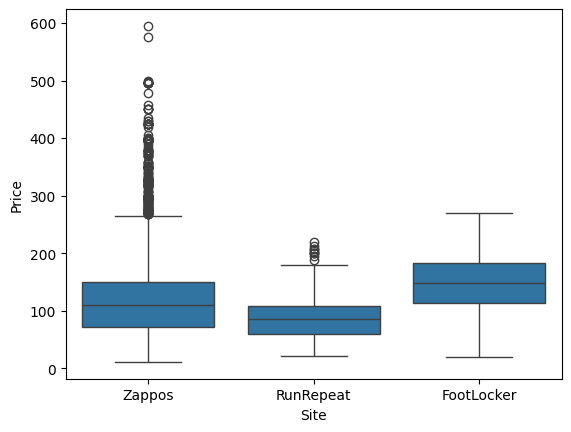

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x='Site', y='Price')

Average rating and price per site

In [ ]:
df.groupby('Site')[['Price', 'Rating']].mean()

,Price,Rating
Site,,
FootLocker,145.078994,4.480447
RunRepeat,88.156863,4.340686
Zappos,120.367668,4.017584


Most common shoes across sites

In [ ]:
df['name_clean'] = df['Name'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df['name_clean'].value_counts().head()

,count
name_clean,
nike air max dn,9
nike dunk low,8
vans authentic,7
new balance 2002r,6
vans old skool,6


Correlation between price and rating

In [ ]:
df[['Price', 'Rating']].corr()

,Price,Rating
Price,1.000000,0.025935
Rating,0.025935,1.000000


Top-rated shoes by site

In [ ]:
df.sort_values(['Site', 'Rating'], ascending=[True, False]).groupby('Site').head(5)

,Name,Price,Rating,Site,name_clean
28,adidas adilette 22 slide,67.49,5.00,FootLocker,adidas adilette 22 slide
29,adidas adilette aqua,26.99,5.00,FootLocker,adidas adilette aqua
38,adidas adistar cushion 3,187.64,5.00,FootLocker,adidas adistar cushion 3
48,adidas adizero aruku,148.49,5.00,FootLocker,adidas adizero aruku
64,adidas anthony edwards 1,121.49,5.00,FootLocker,adidas anthony edwards 1
3978,nike sb vertebrae,68.00,4.85,RunRepeat,nike sb vertebrae
4006,nike zoom vomero 5,85.00,4.85,RunRepeat,nike zoom vomero 5
185,adidas ozweego,45.00,4.75,RunRepeat,adidas ozweego
585,asics gel 1130,80.00,4.75,RunRepeat,asics gel 1130
3834,nike air force 1 07 lv8,70.00,4.75,RunRepeat,nike air force 1 07 lv8


Lowest price per site

In [ ]:
site_counts = df.groupby('Name')['Site'].nunique()

multi_site_shoes = site_counts[site_counts > 1].index

multi_site_df = df[df['Name'].isin(multi_site_shoes)]

cheapest_prices = multi_site_df.loc[multi_site_df.groupby('Name')['Price'].idxmin()]

result = cheapest_prices[['Name', 'Price', 'Site']].sort_values(by='Name')

print(result)

                         Name   Price        Site
77          adidas campus 00s   40.00   RunRepeat
116            adidas gazelle   55.00   RunRepeat
152   adidas handball spezial   40.00   RunRepeat
234           adidas samba og   60.00   RunRepeat
249         adidas stan smith   32.00   RunRepeat
...                       ...     ...         ...
6294           vans knu skool   40.00   RunRepeat
6314           vans old skool   40.50  FootLocker
6329              vans sk8-hi   71.35      Zappos
6354               veja campo  106.00   RunRepeat
6483          xero shoes prio   58.00   RunRepeat

[142 rows x 3 columns]


In [ ]:
multi_site_df

,Name,Price,Rating,Site,name_clean
76,adidas campus 00s,94.50,5.00,FootLocker,adidas campus 00s
77,adidas campus 00s,40.00,4.70,RunRepeat,adidas campus 00s
78,adidas campus 00s,121.49,5.00,FootLocker,adidas campus 00s
79,adidas campus 00s,148.49,5.00,FootLocker,adidas campus 00s
115,adidas gazelle,147.14,5.00,FootLocker,adidas gazelle
...,...,...,...,...,...
6329,vans sk8-hi,71.35,4.00,Zappos,vans sk8hi
6354,veja campo,106.00,4.45,RunRepeat,veja campo
6355,veja campo,149.95,4.00,Zappos,veja campo
6482,xero shoes prio,68.39,5.00,Zappos,xero shoes prio


In [ ]:
lowest_price_counts = cheapest_prices['Site'].value_counts()
print(lowest_price_counts)

Site
RunRepeat     110
Zappos         29
FootLocker      3
Name: count, dtype: int64


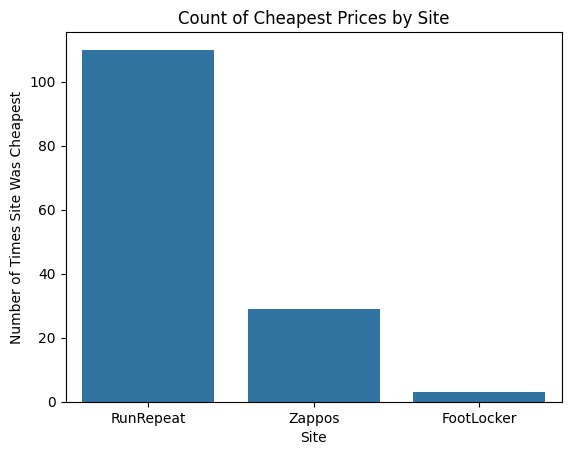

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=lowest_price_counts.index, y=lowest_price_counts.values)
plt.title("Count of Cheapest Prices by Site")
plt.ylabel("Number of Times Site Was Cheapest")
plt.xlabel("Site")
plt.show()

Average price difference between sites (same shoes only)

In [ ]:
multi_site_with_min = multi_site_df.merge(
    cheapest_prices[['Name', 'Price']].rename(columns={'Price': 'MinPrice'}),
    on='Name'
)

multi_site_with_min['PriceDifference'] = multi_site_with_min['Price'] - multi_site_with_min['MinPrice']

avg_diff = multi_site_with_min[multi_site_with_min['PriceDifference'] > 0].groupby('Site')['PriceDifference'].mean()
print(avg_diff)


Site
FootLocker    75.395273
RunRepeat      2.245000
Zappos        32.720000
Name: PriceDifference, dtype: float64


Price distribution of same shoes per site

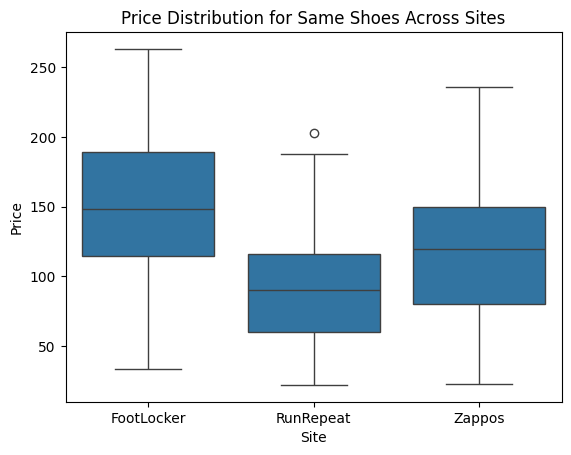

In [ ]:
sns.boxplot(data=multi_site_df, x='Site', y='Price')
plt.title("Price Distribution for Same Shoes Across Sites")
plt.show()

Price vs Rating

In [ ]:
sns.scatterplot(data=df, x='Rating', y='Price', hue='Site')
plt.title("Rating vs Price")
plt.show()

In [ ]:
df['ValueScore'] = df['Rating'] / df['Price']
sns.boxplot(data=df, x='Site', y='ValueScore')
plt.title("Value Score (Rating per Price) by Site")
plt.show()


Top 10 most overpriced shoes (same shoe, big price difference)

In [ ]:
price_gap = multi_site_df.groupby('Name_clean')['Price'].agg(['min', 'max'])
price_gap['gap'] = price_gap['max'] - price_gap['min']
top_overpriced = price_gap.sort_values('gap', ascending=False).head(10)
print(top_overpriced)

KeyError: 'Name_clean'